In [1]:
# 专注于 276240 和 276241 留仙大道的分析
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from chinese_calendar import is_workday, is_holiday
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
%matplotlib inline

In [2]:
data_path = 'D:\\dataset\\traffic1\\'

In [3]:
tti = pd.read_csv(data_path + 'train_TTI.csv')
tti['time'] = pd.to_datetime(tti['time'])
tti.head()

,id_road,TTI,speed,time
0,276183,1.03472,69.6197,2019-01-01 00:00:00
1,276183,1.03506,69.6275,2019-01-01 00:10:00
2,276183,1.04166,69.1003,2019-01-01 00:20:00
3,276183,1.02642,70.1266,2019-01-01 00:30:00
4,276183,1.01442,70.9565,2019-01-01 00:40:00


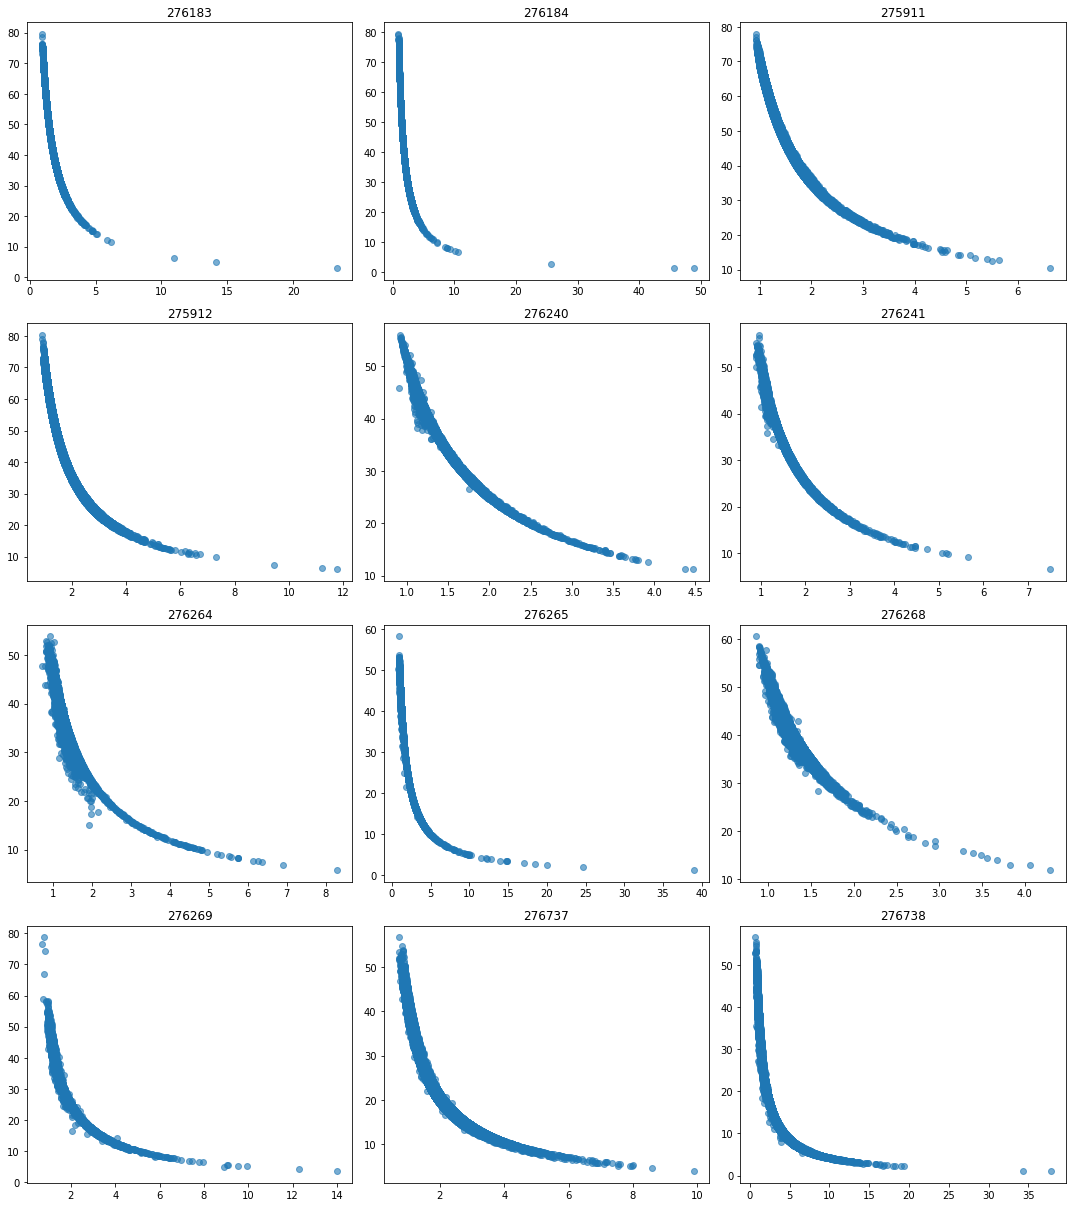

In [30]:
# 筛选前画图
plt.figure(figsize=(15, 25))
for idx, id_road in enumerate(pd.unique(tti.id_road)):
    plt.subplot(6, 3, idx + 1)
    plt.scatter(tti[tti.id_road == id_road].TTI, tti[tti.id_road == id_road].speed, alpha=0.6)
#     plt.legend()
    plt.title(id_road)
plt.tight_layout()

In [11]:
strict_rule = {
    "276183": 10,
    "276184": 20,
    "275911": 6,
    "275912": 8,
    "276240": 100,
    "276241": 6,
    "276264": 7,
    "276265": 20,
    "276268": 100,
    "276269": 11,
    "276737": 9,
    "276738": 20,
}

loose_rule = {
    "276183": 15,
    "276184": 20,
    "275911": 100,
    "275912": 8,
    "276240": 100,
    "276241": 100,
    "276264": 100,
    "276265": 25,
    "276268": 100,
    "276269": 12,
    "276737": 100,
    "276738": 20,
}

print(tti.size)

1184792


In [37]:
tti_stricted_clean = tti
tti_stricted_clean = tti_stricted_clean.reset_index(drop=True)
cleaned_index_total = pd.Index([])
for key, value in strict_rule.items():
    cleaned_index = tti_stricted_clean[(tti_stricted_clean["id_road"] == int(key)) & (tti_stricted_clean["TTI"] > value)].index
#     print(tti_stricted_clean[(tti_stricted_clean["id_road"] == int(key)) & (tti_stricted_clean["TTI"] > value)].index)
    tti_stricted_clean = tti_stricted_clean.drop(cleaned_index)
    cleaned_index_total = cleaned_index_total.union(cleaned_index)
    
print("筛选掉：" + str(tti.shape[0] - tti_stricted_clean.shape[0]) + "条数据")
print(cleaned_index_total.size)
print(tti.iloc[cleaned_index_total])

筛选掉：20条数据
20
        id_road       TTI     speed                time
15057    276183  10.96550   6.46394 2019-10-15 16:30:00
15058    276183  14.17110   5.01617 2019-10-15 16:40:00
15306    276183  23.33820   3.04903 2019-10-17 10:00:00
35735    276184  25.67440   2.77856 2019-03-18 10:20:00
35736    276184  45.64320   1.56109 2019-03-18 10:30:00
35737    276184  48.91030   1.45542 2019-03-18 10:40:00
72983    275911   6.62741  10.49190 2019-12-13 06:20:00
84643    275912  11.77470   6.12098 2019-03-14 08:40:00
84644    275912  11.22260   6.43016 2019-03-14 08:50:00
97166    275912   9.45803   7.34284 2019-12-09 08:20:00
143786   276241   7.50065   6.59202 2019-11-19 09:20:00
164782   276264   8.28781   5.79340 2019-10-24 07:50:00
176973   276265  38.99880   1.26519 2019-01-27 03:20:00
183628   276265  20.03220   2.50213 2019-03-14 09:10:00
184197   276265  24.62280   2.03564 2019-03-18 08:00:00
234696   276269  14.01050   3.65962 2019-03-25 09:10:00
234697   276269  12.29930   4.16865

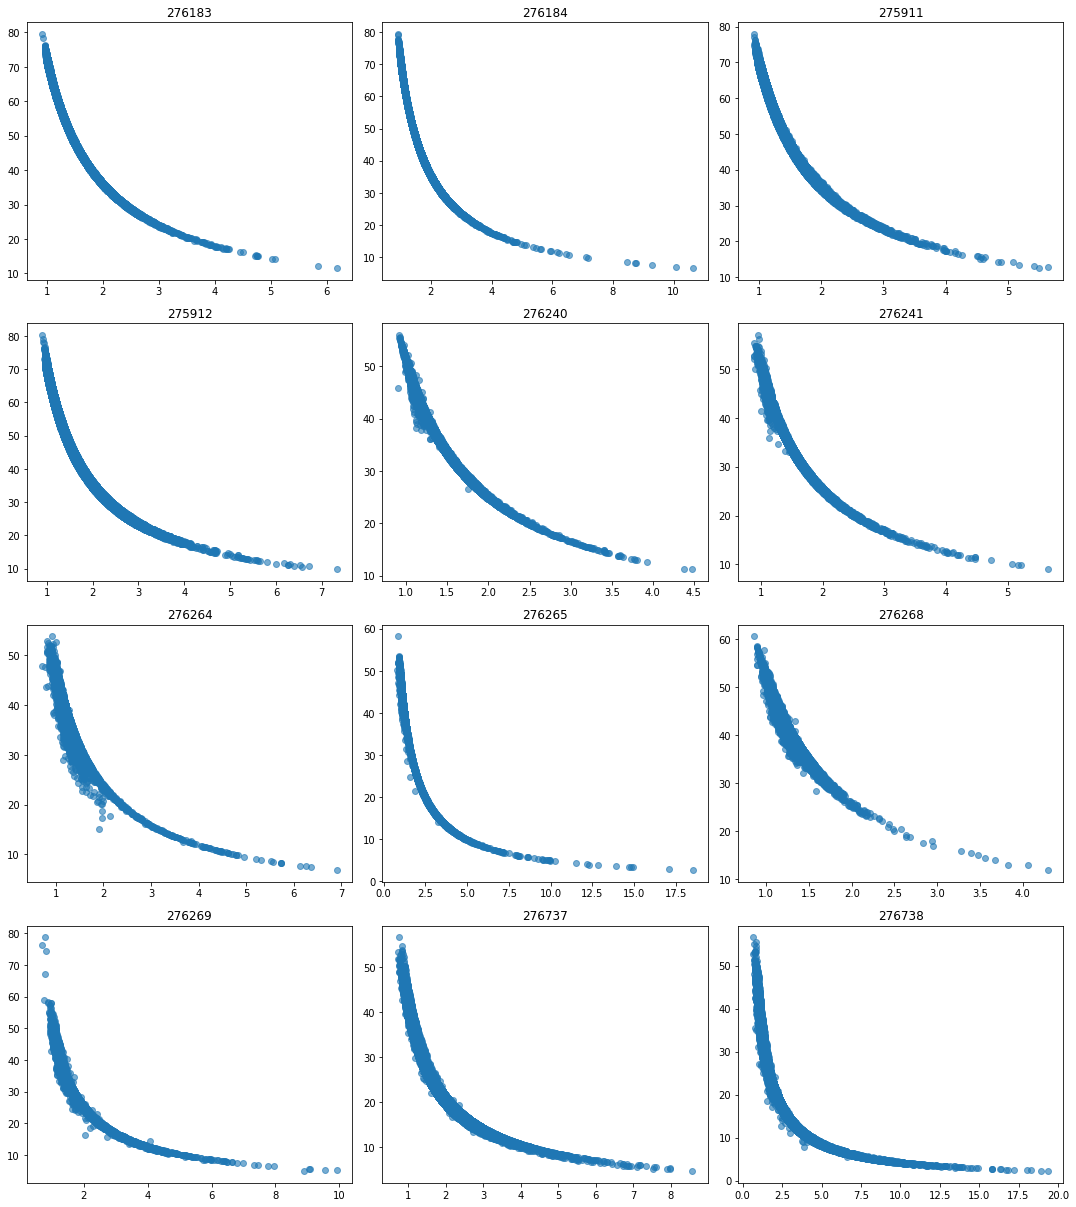

In [29]:
# 严格筛选之后画图
plt.figure(figsize=(15, 25))
for idx, id_road in enumerate(pd.unique(tti_stricted_clean.id_road)):
    plt.subplot(6, 3, idx + 1)
    plt.scatter(tti_stricted_clean[tti_stricted_clean.id_road == id_road].TTI, tti_stricted_clean[tti_stricted_clean.id_road == id_road].speed, alpha=0.6)
#     plt.legend()
    plt.title(id_road)
plt.tight_layout()

In [38]:
# 宽松筛选
tti_loosely_clean = tti
cleaned_index_total = pd.Index([])
for key, value in loose_rule.items():
    cleaned_index = tti_loosely_clean[(tti_loosely_clean["id_road"] == int(key)) & (tti_loosely_clean["TTI"] > value)].index
#     print(tti_stricted_clean[(tti_stricted_clean["id_road"] == int(key)) & (tti_stricted_clean["TTI"] > value)].index)
    tti_loosely_clean = tti_loosely_clean.drop(cleaned_index)
    cleaned_index_total = cleaned_index_total.union(cleaned_index)
    
print("筛选掉：" + str(tti.shape[0] - tti_loosely_clean.shape[0]) + "条数据")
print(tti.loc[cleaned_index_total])

筛选掉：12条数据
        id_road       TTI    speed                time
15306    276183  23.33820  3.04903 2019-10-17 10:00:00
35735    276184  25.67440  2.77856 2019-03-18 10:20:00
35736    276184  45.64320  1.56109 2019-03-18 10:30:00
35737    276184  48.91030  1.45542 2019-03-18 10:40:00
84643    275912  11.77470  6.12098 2019-03-14 08:40:00
84644    275912  11.22260  6.43016 2019-03-14 08:50:00
97166    275912   9.45803  7.34284 2019-12-09 08:20:00
176973   276265  38.99880  1.26519 2019-01-27 03:20:00
234696   276269  14.01050  3.65962 2019-03-25 09:10:00
234697   276269  12.29930  4.16865 2019-03-25 09:20:00
284727   276738  37.80100  1.07300 2019-10-01 16:30:00
284728   276738  34.36420  1.18321 2019-10-01 16:40:00


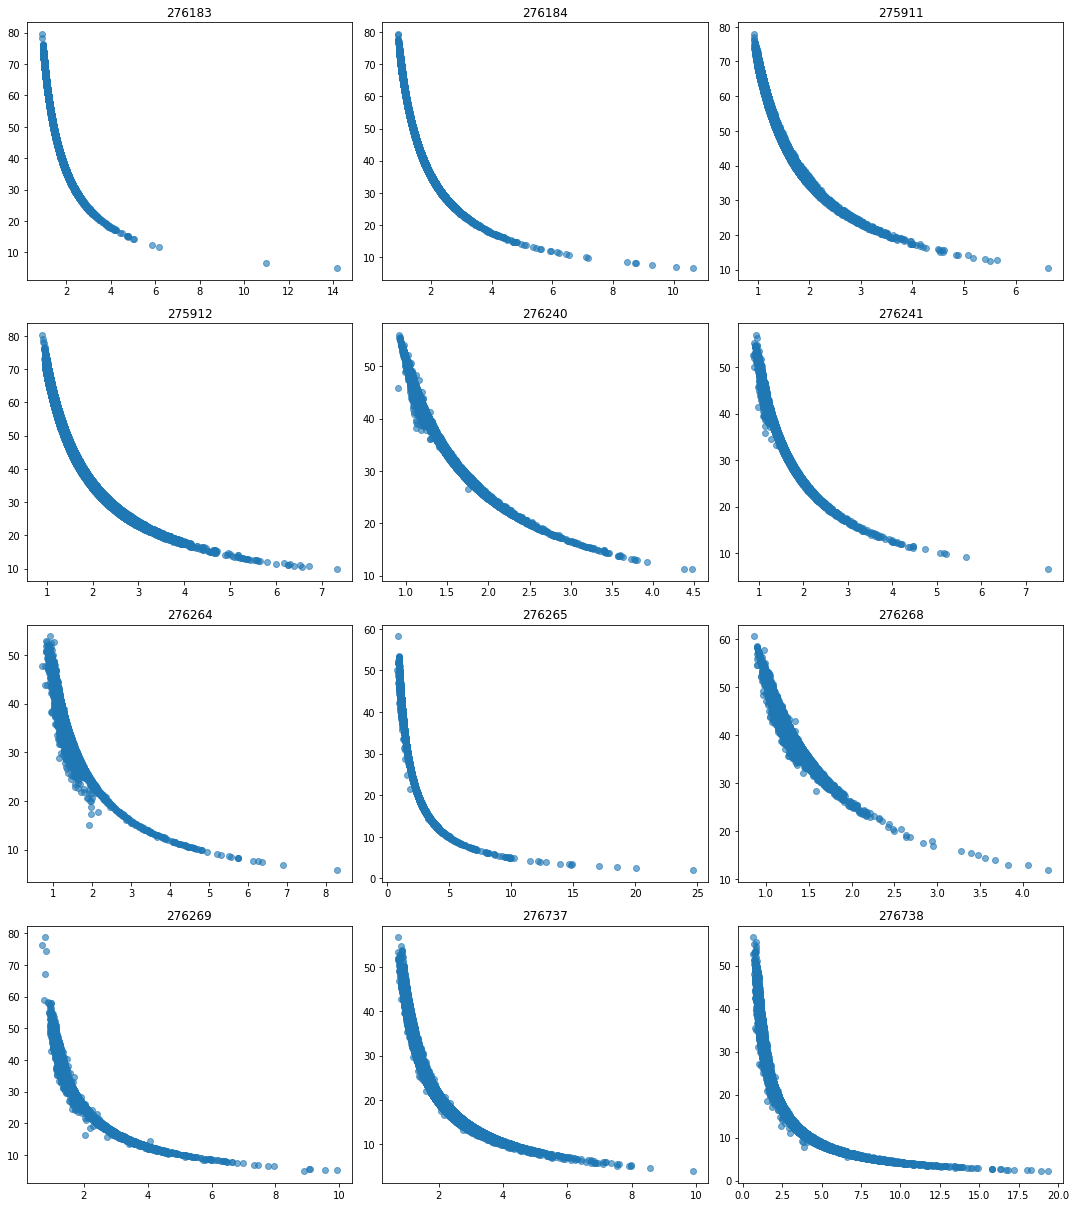

In [39]:
# 宽松筛选之后画图
plt.figure(figsize=(15, 25))
for idx, id_road in enumerate(pd.unique(tti_loosely_clean.id_road)):
    plt.subplot(6, 3, idx + 1)
    plt.scatter(tti_loosely_clean[tti_loosely_clean.id_road == id_road].TTI, tti_loosely_clean[tti_loosely_clean.id_road == id_road].speed, alpha=0.6)
#     plt.legend()
    plt.title(id_road)
plt.tight_layout()

In [40]:
tti_stricted_clean.to_csv('D:\\dataset\\traffic1\\stricted_cleaned_data.csv',index=False)

In [41]:
tti_loosely_clean.to_csv('D:\\dataset\\traffic1\\loosely_cleaned_data.csv',index=False)